<a href="https://colab.research.google.com/github/kanacb/pythonmasterclass/blob/main/Lesson5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 5 - Data Handling

85% of Data Science projects have failed because we don't know how to handle data. This exercise, you will learn how to wrangle data like a Texan on wild Mustang. Get ready to learn some hardcore maneuvers to impress your creative abilities on how you can handle data. We begin looking at it from a statistical point of view and then begin to extarct information that is key to understand the data. Now you are ready to tame any wild mustang out there.


 <img class="center" src="https://blogs.sas.com/content/datamanagement/files/2016/09/43621333-300x255.jpg">



# Pandas, why and how it can help us?

Create a simple dataset to view the basic of statistics. Lets explore the panda. Is it black with spots or white black spots? 

In [4]:
import numpy as py
import pandas as pd
import sys                             # Read system parameters.
import os  
import matplotlib                      # Create 2D charts.
import matplotlib.pyplot as plt
data = [1,2,2,3,3,3,4,4,5]
df = pd.DataFrame(data)
df

,0
0,1
1,2
2,2
3,3
4,3
5,3
6,4
7,4
8,5


Description of data.
1. Count = number of elements in the array
2. mean = the mean value, is the average value
3. std = standard deviation
4. min = the minimum value in the array
5. 25% = 25% quartile of the values
6. 50% = 50% quartile of the values
7. 75% = 75% quartile of the values
8. max = the maximu value in the array

In [4]:
df.describe()

,0
count,9.000000
mean,3.000000
std,1.224745
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


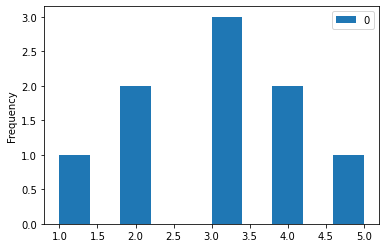

In [5]:
df.plot.hist()

mean is the average value [3.]
median is the middle value [3.]
mode is value that occurs most often [[3]]
Highest Density value 0.2736956262086172


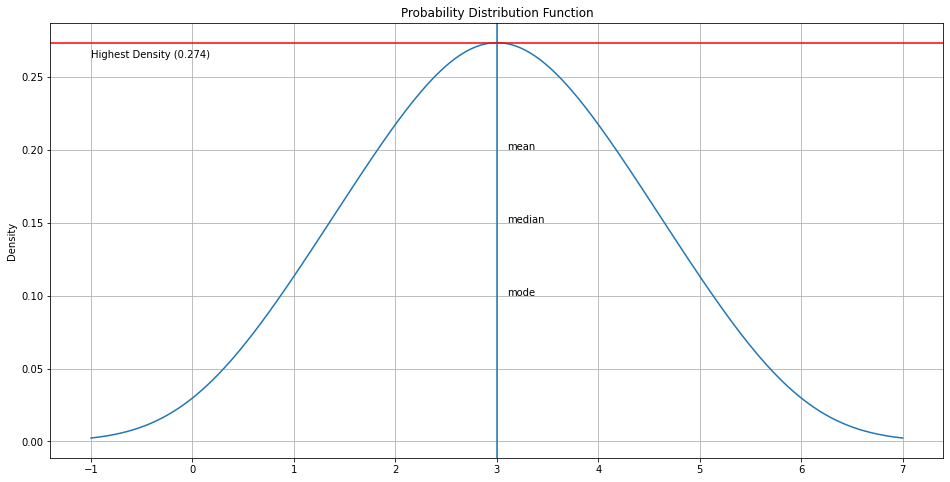

In [6]:
ax = df.plot.density(title="Probability Distribution Function",figsize=(16,8),grid=True,legend=False)
ax.axvline(x=df.describe()[0][1],label="asdf")
ax.text(3.1,0.2,"mean")
ax.text(3.1,0.15,"median")
ax.text(3.1,0.10,"mode")
data = ax.get_lines()[0].get_data()
hd = data[1].max()
ax.axhline(hd,color="red")
ax.text(-1,hd-0.01,f"Highest Density ({hd:0.3})")
#ax.fill_betweenx(1,2)
print("mean is the average value",df.mean(axis=0).values)
print("median is the middle value",df.median(axis=0).values)
print("mode is value that occurs most often",df.mode(axis=0).values)
print("Highest Density value",hd)

In [ ]:
data

> Standard Deviation






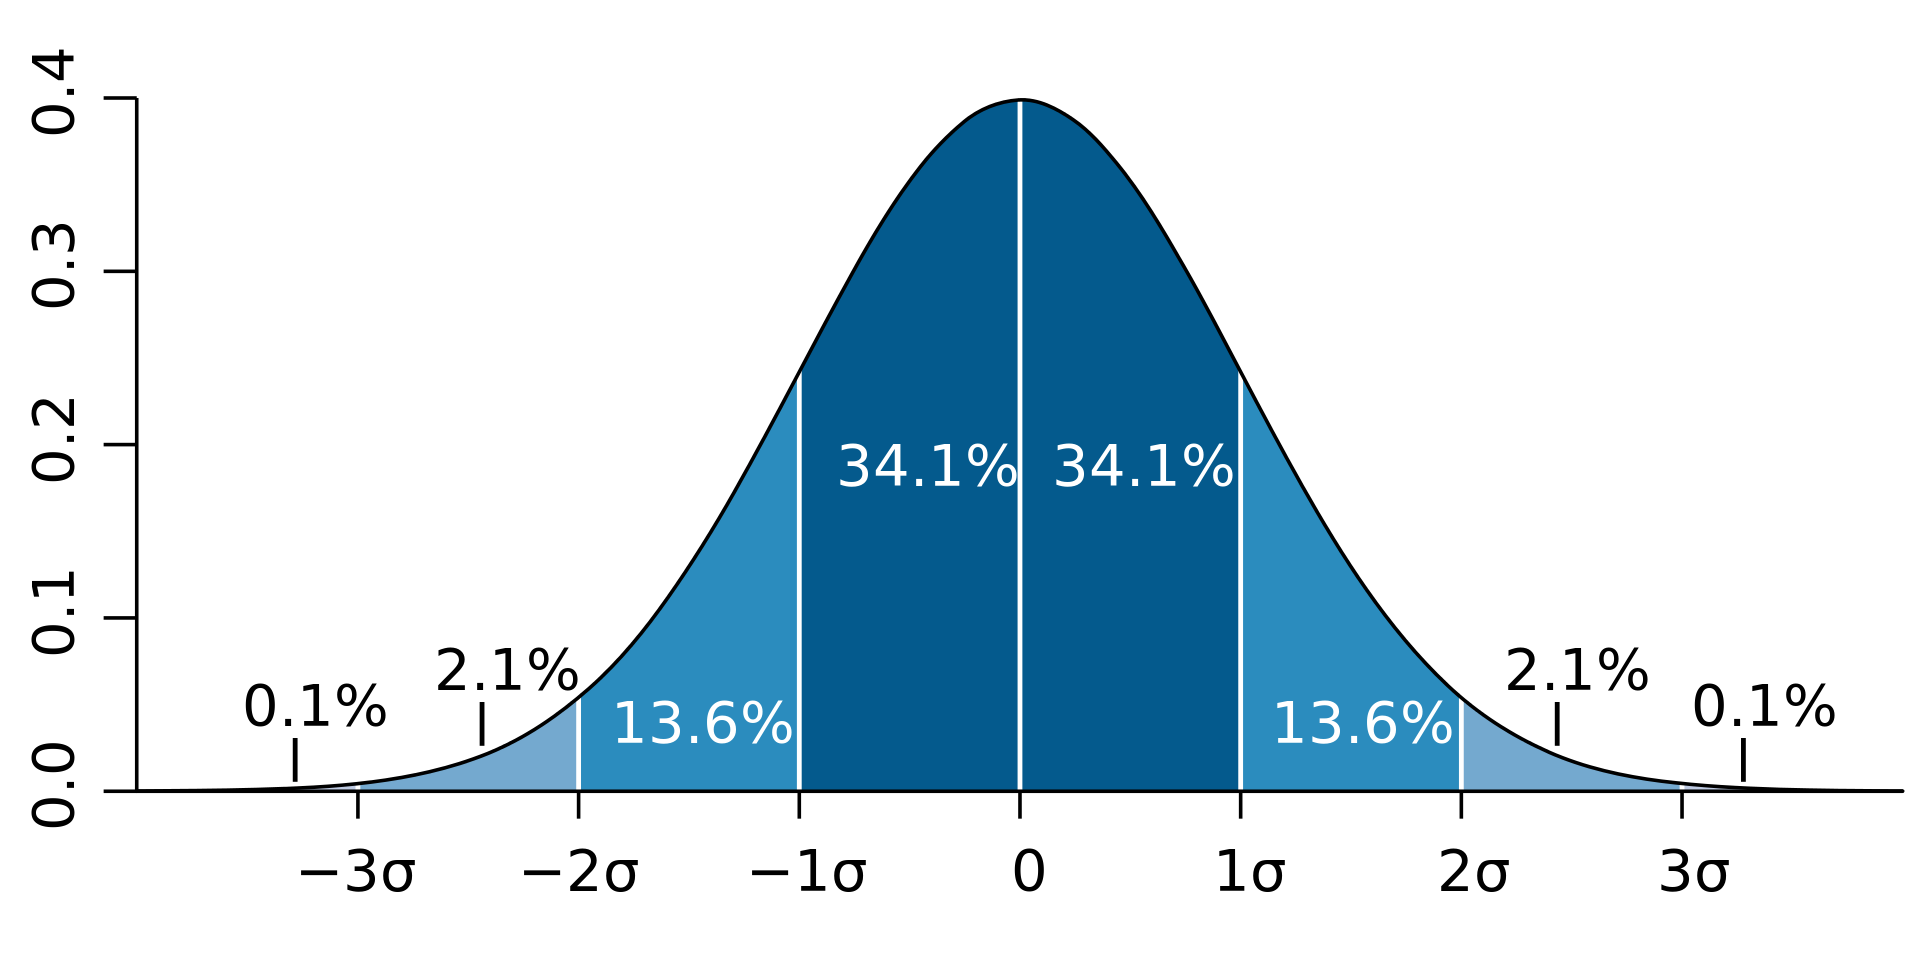

The probability density function (pdf) of the normal distribution, also called Gaussian or "bell curve", the most important continuous random distribution. As notated on the figure, the probabilities of intervals of values correspond to the area under the curve.

# Look At Real Data

Clean data is all the same but dirty data is unique.

<img src="https://cdn.britannica.com/70/205170-050-C8F46187/Titanic-survivors-lifeboats-May-15-1912.jpg">

In [11]:
data_raw = pd.read_csv('train.csv')
print('Loaded {} records from {}.'.format(len(data_raw), data_raw_file))

Loaded 891 records from /content/drive/MyDrive/Colab Notebooks/CAIP/Classification/titanic_data/train.csv.


# Get acquainted with the dataset

In [12]:
print(data_raw.info())      # View data types and see if there are missing entries.
data_raw.head(10)           # View first 10 records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Examine a general summary of statistics

In [13]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data_raw.describe())

       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 714.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.70   0.52   0.38  32.20
std         257.35      0.49    0.84  14.53   1.10   0.81  49.69
min           1.00      0.00    1.00   0.42   0.00   0.00   0.00
25%         223.50      0.00    2.00  20.12   0.00   0.00   7.91
50%         446.00      0.00    3.00  28.00   0.00   0.00  14.45
75%         668.50      1.00    3.00  38.00   1.00   0.00  31.00
max         891.00      1.00    3.00  80.00   8.00   6.00 512.33


In [14]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data_raw.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))

       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 714.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.70   0.52   0.38  32.20
std         257.35      0.49    0.84  14.53   1.10   0.81  49.69
min           1.00      0.00    1.00   0.42   0.00   0.00   0.00
10%          90.00      0.00    1.00  14.00   0.00   0.00   7.55
20%         179.00      0.00    1.00  19.00   0.00   0.00   7.85
30%         268.00      0.00    2.00  22.00   0.00   0.00   8.05
40%         357.00      0.00    2.00  25.00   0.00   0.00  10.50
50%         446.00      0.00    3.00  28.00   0.00   0.00  14.45
60%         535.00      0.00    3.00  31.80   0.00   0.00  21.68
70%         624.00      1.00    3.00  36.00   1.00   0.00  27.00
80%         713.00      1.00    3.00  41.00   1.00   1.00  39.69
90%         802.00      1.00    3.00  50.00   1.00   2.00  77.96
max         891.00      1.00    3.00  80.00   8.00   6.00 512.33


# Use stacked bar visualization to show survival numbers

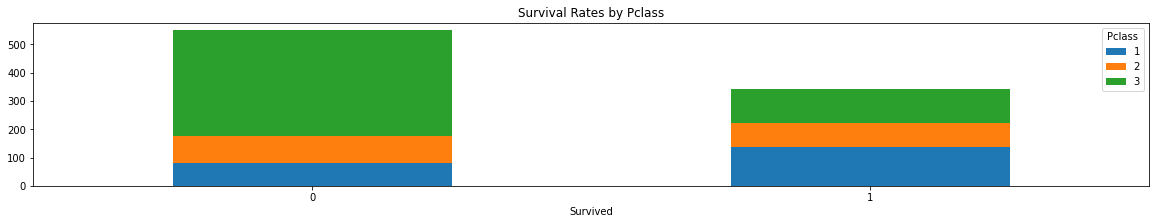

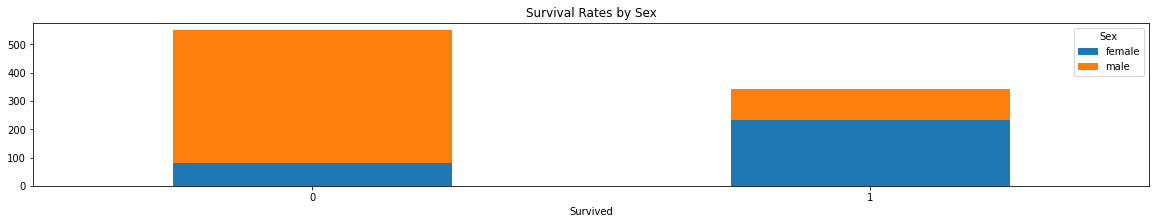

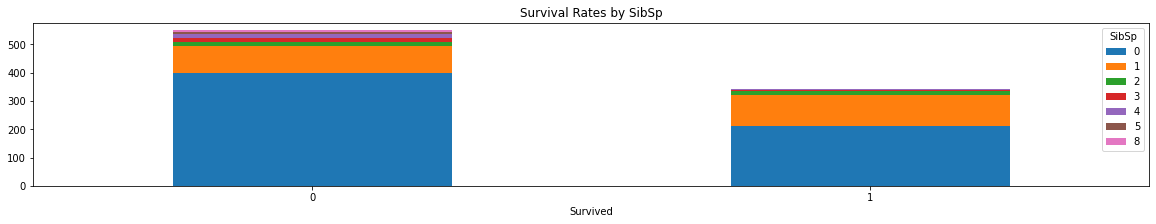

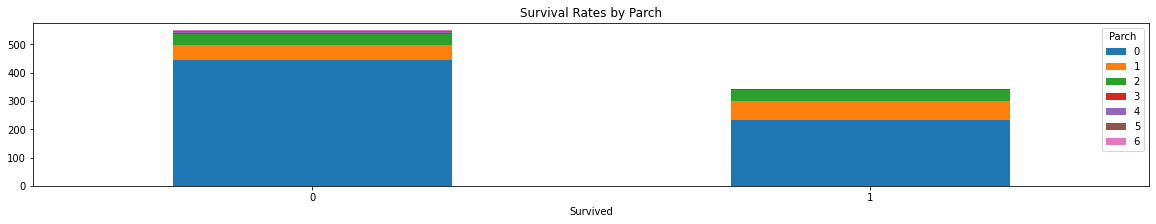

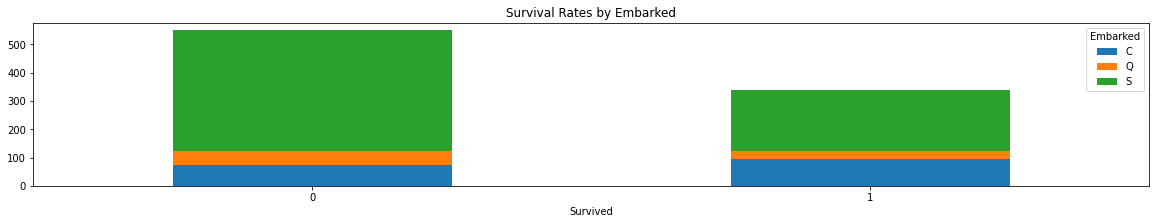

In [15]:
feature_list = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for feature in feature_list:
    plot_set = data_raw.groupby([feature, 'Survived'])
    plot_set = plot_set.size().reset_index()
    plot_set = plot_set.pivot(columns=feature,index='Survived',values=0)
    plot_set.plot(kind='bar', stacked=True, rot=0, figsize=(20,3)).set_title(f'Survival Rates by {feature}');

# Assignments

1.   Create a new row of men and women
2.   Plot 2 graphs of Men Vs Survival and Women Vs Survival
3. Identify missing values
4. Replace missing values with the median value
5. A dataset can contain a range of values that depict a certain characteristic, such as grades on tests in a class during the semester. A specific student has so far received the following grades: 76, 81, 78,87, 75, and 72. There is one final test in the semester. What minimum grade would the student need to achieve on the last test to get an 80% average?



In [17]:
men = data_raw[data_raw['Sex']=='male'].round(0)
men

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.0,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.0,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,52.0,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.0,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


In [18]:
women = data_raw[data_raw['Sex']=='female'].round(0)
women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,8.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.0,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.0,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,11.0,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.0,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S


(0.0, 20.0)

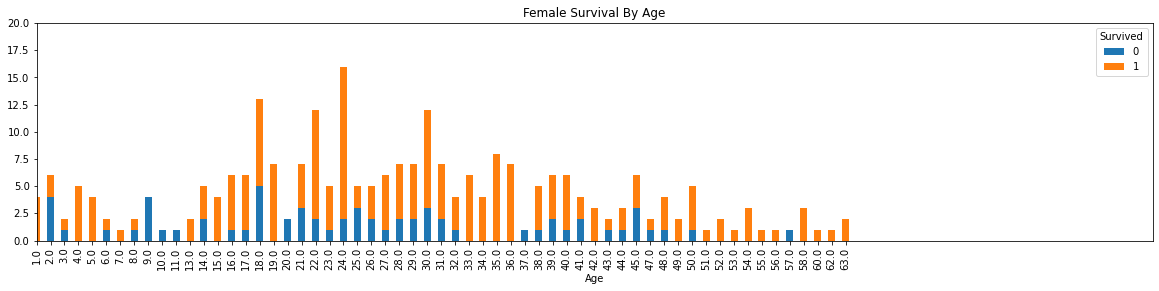

In [20]:
women_plot = women.groupby(['Survived','Age']).size().reset_index().pivot(columns="Survived",index="Age",values=0)
ax = women_plot.plot(kind="bar",stacked=True,figsize=(20,4),title="Female Survival By Age")
ax.set_xlim(0,80)
ax.set_ylim(0,20)

(0.0, 20.0)

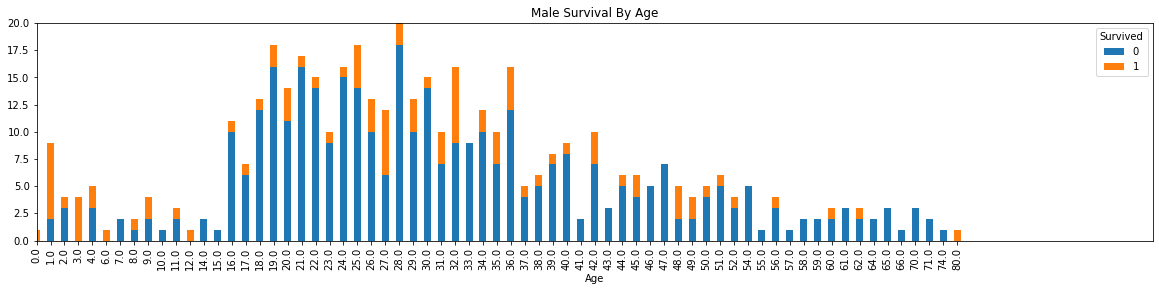

In [21]:
men_plot = men.groupby(['Survived','Age']).size().reset_index().pivot(columns="Survived",index="Age",values=0)
ax = men_plot.plot(kind="bar",stacked=True,figsize=(20,4),title="Male Survival By Age")
ax.set_xlim(0,80)
ax.set_ylim(0,20)

In [31]:
print('Number of missing values: \n{}\n'.format(data_raw.isnull().sum()))

Number of missing values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64



In [23]:
data_raw['Age'].fillna(data_raw['Age'].median(), inplace=True)

In [30]:
data_raw['Embarked'].fillna(data_raw['Embarked'].mode()[0], inplace=True)